## Two-step microsegmentation model for customer risk assessment

#### Install the below packages to run the document.

pip install pandas

pip install numpy

pip install altair

pip install matplotlib

pip install sklearn

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

#### Reading claims data to a pandas dataframe
#### claims csv file is available in the same folder for reference

In [2]:
claims_data = pd.read_csv("AXA_Claims.csv", encoding = 'latin-1')

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Glimpse of the dataset

In [4]:
claims_data.head(10)

,Report_D,Loss_d,Int_Id,Incept_D,Class_Use_C,loss_y,oth_itot,Loss_M,Loss_Q,AD_NTOT,...,TPD_ITOT,AD_ITOT,CREDIT_RATING_C,PENALTY_POINTS,TPI_ITOT,PTY_ID_hashed,claimid_hashed,Total,claim_date,incident_date
0,20181127,20181120,0,19700101,5,2018,0.00,201811,20184,0,...,0.0,215.65,C,0,0.0,A3AE79F40F55AAA67D91ABABE3EBD2AF42B6317F50049B...,00021E0D6C87BA9D75EE3F339C573A7F3418D0DE2FE40D...,215.65,11/27/2018,11/20/2018
1,20190924,20190821,136556,19970630,1,2019,0.00,201908,20193,0,...,237.0,159.00,C,0,0.0,D8541F6B19B992BCCB81711961C13CF2D9A4BA8E70D00D...,000353143631A995BED15892E74C526834658FEB3F3733...,396.00,9/24/2019,8/21/2019
2,20190108,20190105,0,20050827,6,2019,99.31,201901,20191,1,...,146.0,169.00,C,0,0.0,2F1EFD966EBEDBC0F6EF3617DD30B311346EF5F043AE7E...,0003AC77E8503676410560E9892A4994B88320A9757CEC...,414.31,1/8/2019,1/5/2019
3,20170530,20170519,0,20160401,6,2017,102.21,201705,20172,0,...,1491.0,13.00,B,0,0.0,F11DEA3E4582E43809F2E8DB9C610588697AA13980126B...,00092194AF174894BAF5E917120592606F1164054BFB83...,1606.21,5/30/2017,5/19/2017
4,20160105,20151228,116849,20150430,6,2015,0.00,201512,20154,0,...,618.0,297.00,A,0,4573.0,903121340BFF40284C2DEA2207987412E4D47868AD9131...,000A97BF8C6027B70A8B39A542713629206C8B7020E2CC...,5488.00,1/5/2016,12/28/2015
5,20160914,20160809,0,20141017,6,2016,0.00,201608,20163,0,...,544.0,92.00,C,0,0.0,175C6F322B01E28FCEF630B64C0E562C8AB0E0ABD5BC5D...,000D8A36D14718D78CF43B4A5F92D9ED0D8329507E4467...,636.00,9/14/2016,8/9/2016
6,20170710,20170709,500115,20161012,6,2017,0.00,201707,20173,1,...,1902.0,153.00,C,0,0.0,53BEDACAE8A03DAD406BDC12640197A3824F4A22E0248A...,000E80BC11E31113BD8586917167374811FE0204B4CE3C...,2055.00,7/10/2017,7/9/2017
7,20200204,20200204,0,20190114,6,2020,0.00,202002,20201,1,...,1449.0,145.00,D,0,0.0,F7D5C0377575D6409D64234F1DAFD921CDCA3CB1EBA2A5...,000F40A8D66CD2570BC9BA1DF74894B1B5DDCF83E62336...,1594.00,2/4/2020,2/4/2020
8,20170608,20170503,0,20160905,1,2017,215.65,201705,20172,0,...,2625.0,169.00,C,0,0.0,E8ED8848D77C214089F71B3E39E26CF8DB40FD1185BF85...,0010A0288C441B8BFF172712ADC4CC83D5B25E636550CA...,3009.65,6/8/2017,5/3/2017
9,20150810,20150810,0,19941215,1,2015,0.00,201508,20153,0,...,1032.0,289.00,C,0,0.0,2B6716F7A256D5730858A66616CAC1A9A8730E540801FE...,00137E7281667DE49417E0776AA693CFC0FBBFA99DD5C6...,1321.00,8/10/2015,8/10/2015


In [5]:
claims_data.shape

(37909, 23)

In [6]:
claims_data1 = claims_data.drop(['Total'], axis=1)

In [7]:
claims_data1.dtypes

Report_D             int64
Loss_d               int64
Int_Id               int64
Incept_D             int64
Class_Use_C          int64
loss_y               int64
oth_itot           float64
Loss_M               int64
Loss_Q               int64
AD_NTOT              int64
TPD_NTOT             int64
TPI_NTOT             int64
OTH_NTOT             int64
TPD_ITOT           float64
AD_ITOT            float64
CREDIT_RATING_C     object
PENALTY_POINTS       int64
TPI_ITOT           float64
PTY_ID_hashed       object
claimid_hashed      object
claim_date          object
incident_date       object
dtype: object

#### Checking for null or NA values

In [8]:
null_cols=claims_data1.columns[claims_data1.isnull().any()]
claims_data1[null_cols].isnull().sum()

TPD_ITOT           1
CREDIT_RATING_C    1
dtype: int64

#### Removing the nulls

In [9]:
claims_data1=claims_data1.dropna()

In [10]:
null_cols=claims_data1.columns[claims_data1.isnull().any()]
claims_data1[null_cols].isnull().sum()

Series([], dtype: float64)

#### Bringing the total number of claims to a variable 'Total_claims' which is cumulative of Number of accidental damage claims, Number of third party damage claims, Number of third party injury claims and other claims

In [11]:
claims_data1['Total_claims']= claims_data1['AD_NTOT'] + claims_data1['TPD_NTOT'] + claims_data1['TPI_NTOT'] + claims_data1['OTH_NTOT']

#### Bringing the total amount claimed to a variable 'Amount_claimed' which is cumulative of Amount incurred for third party damage claims, Amount incurred for acidental damage claims, Amount incurred for third party incurred claims and amount paid for other claims.

In [12]:
claims_data1['Amount_claimed']= claims_data1['TPD_ITOT'] + claims_data1['AD_ITOT'] + claims_data1['TPI_NTOT'] + claims_data1['TPI_ITOT'] + claims_data1['oth_itot']

#### Since models only understand numbers, converting the categorical variable 'CREDIT_RATING_C' to numeric values

In [13]:
claims_data1["CREDIT_RATING_C"]=claims_data1["CREDIT_RATING_C"].replace(['A','B','C','D'],[1,2,3,4])

In [14]:
claims_data1.head()

,Report_D,Loss_d,Int_Id,Incept_D,Class_Use_C,loss_y,oth_itot,Loss_M,Loss_Q,AD_NTOT,...,AD_ITOT,CREDIT_RATING_C,PENALTY_POINTS,TPI_ITOT,PTY_ID_hashed,claimid_hashed,claim_date,incident_date,Total_claims,Amount_claimed
0,20181127,20181120,0,19700101,5,2018,0.00,201811,20184,0,...,215.65,3,0,0.0,A3AE79F40F55AAA67D91ABABE3EBD2AF42B6317F50049B...,00021E0D6C87BA9D75EE3F339C573A7F3418D0DE2FE40D...,11/27/2018,11/20/2018,1,215.65
1,20190924,20190821,136556,19970630,1,2019,0.00,201908,20193,0,...,159.00,3,0,0.0,D8541F6B19B992BCCB81711961C13CF2D9A4BA8E70D00D...,000353143631A995BED15892E74C526834658FEB3F3733...,9/24/2019,8/21/2019,1,396.00
2,20190108,20190105,0,20050827,6,2019,99.31,201901,20191,1,...,169.00,3,0,0.0,2F1EFD966EBEDBC0F6EF3617DD30B311346EF5F043AE7E...,0003AC77E8503676410560E9892A4994B88320A9757CEC...,1/8/2019,1/5/2019,1,414.31
3,20170530,20170519,0,20160401,6,2017,102.21,201705,20172,0,...,13.00,2,0,0.0,F11DEA3E4582E43809F2E8DB9C610588697AA13980126B...,00092194AF174894BAF5E917120592606F1164054BFB83...,5/30/2017,5/19/2017,1,1606.21
4,20160105,20151228,116849,20150430,6,2015,0.00,201512,20154,0,...,297.00,1,0,4573.0,903121340BFF40284C2DEA2207987412E4D47868AD9131...,000A97BF8C6027B70A8B39A542713629206C8B7020E2CC...,1/5/2016,12/28/2015,1,5488.00


In [15]:
claims=claims_data1[['claim_date','incident_date','Class_Use_C','Total_claims','Amount_claimed','PENALTY_POINTS','CREDIT_RATING_C','PTY_ID_hashed']]

#### Post data manipulation, selecting the required columns

In [16]:
claims.head(5)

,claim_date,incident_date,Class_Use_C,Total_claims,Amount_claimed,PENALTY_POINTS,CREDIT_RATING_C,PTY_ID_hashed
0,11/27/2018,11/20/2018,5,1,215.65,0,3,A3AE79F40F55AAA67D91ABABE3EBD2AF42B6317F50049B...
1,9/24/2019,8/21/2019,1,1,396.00,0,3,D8541F6B19B992BCCB81711961C13CF2D9A4BA8E70D00D...
2,1/8/2019,1/5/2019,6,1,414.31,0,3,2F1EFD966EBEDBC0F6EF3617DD30B311346EF5F043AE7E...
3,5/30/2017,5/19/2017,6,1,1606.21,0,2,F11DEA3E4582E43809F2E8DB9C610588697AA13980126B...
4,1/5/2016,12/28/2015,6,1,5488.00,0,1,903121340BFF40284C2DEA2207987412E4D47868AD9131...


#### Looking for outliers

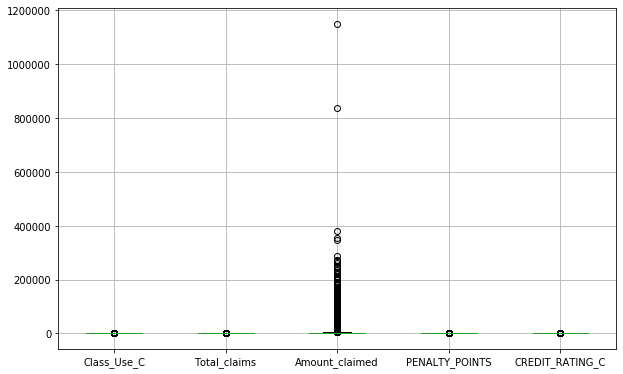

In [17]:
a4_dims = (10, 6.27)
claims.boxplot(figsize=a4_dims)

#### Outliers were detected for 'Amount_claimed'. Since the amount claimed cannot be zero also it has extreme values like 837459.24 , filtering the values within 50 to 10200

In [18]:
claims=claims.loc[(claims['Amount_claimed']>50) & (claims['Amount_claimed']<10200)]


#### Looking at the data distribution. 
#### Amount claimed is a continous data and is also right skewed. Based on the skewness, the column cannot be dropped as it is one of the potential columns. From the population, most of them have CREDIT_RATING_C as 3, penalty point as 1, total claims as 1 and Class_Use_C as 3 to 6.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000147BA7EBBE0>,
      dtype=object)

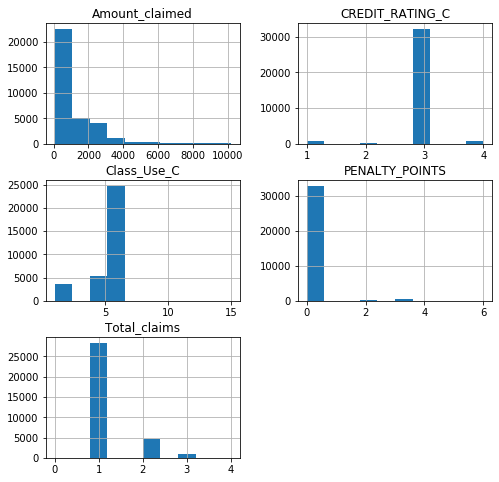

In [19]:
import matplotlib.pyplot as plt
claims[claims.dtypes[(claims.dtypes=="float64")|(claims.dtypes=="int64")]
                        .index.values].hist(figsize=[8,8])

#### size of the dataset after removing part of outliers

In [20]:
len(claims)

33823

#### What happens if we try to remove outliers completely?
#### Obtaining the data between lower and upper quantile range

In [21]:
q_low = claims["Amount_claimed"].quantile(0.25)
q_hi  = claims["Amount_claimed"].quantile(0.75)

df_filtered = claims[(claims["Amount_claimed"] < q_hi) & (claims["Amount_claimed"] > q_low)]

#### If we try to handle the outliers completely, will have to lose major part of data. The size of the data reduced from 33823 to 16621.

In [22]:
len(df_filtered)

16621

### Data Modeling

In [23]:
claims=claims.reset_index()

#### Obtaining the difference between the claimed date and reference date in terms of months

In [24]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
months=[]
for i in range(0,len(claims)):
    claim_date=pd.to_datetime(claims["claim_date"][i])
    today_date=pd.to_datetime("2020-06-20")
    num_months = (today_date.year - claim_date.year) * 12 + (today_date.month - claim_date.month)
    months.append(num_months)
claims["months"]=months
claims.head()

,index,claim_date,incident_date,Class_Use_C,Total_claims,Amount_claimed,PENALTY_POINTS,CREDIT_RATING_C,PTY_ID_hashed,months
0,0,11/27/2018,11/20/2018,5,1,215.65,0,3,A3AE79F40F55AAA67D91ABABE3EBD2AF42B6317F50049B...,19
1,1,9/24/2019,8/21/2019,1,1,396.00,0,3,D8541F6B19B992BCCB81711961C13CF2D9A4BA8E70D00D...,9
2,2,1/8/2019,1/5/2019,6,1,414.31,0,3,2F1EFD966EBEDBC0F6EF3617DD30B311346EF5F043AE7E...,17
3,3,5/30/2017,5/19/2017,6,1,1606.21,0,2,F11DEA3E4582E43809F2E8DB9C610588697AA13980126B...,37
4,4,1/5/2016,12/28/2015,6,1,5488.00,0,1,903121340BFF40284C2DEA2207987412E4D47868AD9131...,53


In [25]:
claims=claims.drop(['index'], axis=1)

In [26]:
claims.head()

,claim_date,incident_date,Class_Use_C,Total_claims,Amount_claimed,PENALTY_POINTS,CREDIT_RATING_C,PTY_ID_hashed,months
0,11/27/2018,11/20/2018,5,1,215.65,0,3,A3AE79F40F55AAA67D91ABABE3EBD2AF42B6317F50049B...,19
1,9/24/2019,8/21/2019,1,1,396.00,0,3,D8541F6B19B992BCCB81711961C13CF2D9A4BA8E70D00D...,9
2,1/8/2019,1/5/2019,6,1,414.31,0,3,2F1EFD966EBEDBC0F6EF3617DD30B311346EF5F043AE7E...,17
3,5/30/2017,5/19/2017,6,1,1606.21,0,2,F11DEA3E4582E43809F2E8DB9C610588697AA13980126B...,37
4,1/5/2016,12/28/2015,6,1,5488.00,0,1,903121340BFF40284C2DEA2207987412E4D47868AD9131...,53


### RFM 

#### The RFM - (Recency, Frequency & Monetary) model to segment the customer functions by dividing the customers based on how recently the person has claimed, how much the person has claimed, how many times the person has claimed along with the penalty points the person owns, his credit card rating and car usage type.
#### If a person has claimed recently but less amount and if it was his first time with zero penalty points and having a good credit card rating, then he is a valuavle customer to the company. You can easily crossell a policy to him since he has recent claim experience and is risk free since he owes a good RFM score. At the same time if a customer has claimed multiple times or claimed huge amount having more penalty points might become risk for the organisation.

In [27]:
claims_Q = claims[['months','Class_Use_C','Total_claims','Amount_claimed','PENALTY_POINTS','CREDIT_RATING_C','claim_date','incident_date','PTY_ID_hashed']]

In [28]:
claims_Q.head()

,months,Class_Use_C,Total_claims,Amount_claimed,PENALTY_POINTS,CREDIT_RATING_C,claim_date,incident_date,PTY_ID_hashed
0,19,5,1,215.65,0,3,11/27/2018,11/20/2018,A3AE79F40F55AAA67D91ABABE3EBD2AF42B6317F50049B...
1,9,1,1,396.00,0,3,9/24/2019,8/21/2019,D8541F6B19B992BCCB81711961C13CF2D9A4BA8E70D00D...
2,17,6,1,414.31,0,3,1/8/2019,1/5/2019,2F1EFD966EBEDBC0F6EF3617DD30B311346EF5F043AE7E...
3,37,6,1,1606.21,0,2,5/30/2017,5/19/2017,F11DEA3E4582E43809F2E8DB9C610588697AA13980126B...
4,53,6,1,5488.00,0,1,1/5/2016,12/28/2015,903121340BFF40284C2DEA2207987412E4D47868AD9131...


#### Obtaining the unique values for the first six columns of the claims dataframe

In [29]:
cu = []
i = []
for cn in claims_Q.columns[:6]:
    cu.append(claims_Q[cn].unique())
    i.append(cn)

claim_unique=pd.DataFrame( cu, index=i).T

In [30]:
claim_unique.head(20)

,months,Class_Use_C,Total_claims,Amount_claimed,PENALTY_POINTS,CREDIT_RATING_C
0,19.0,5.0,1.0,215.65,0.0,3.0
1,9.0,1.0,2.0,396.00,2.0,2.0
2,17.0,6.0,3.0,414.31,4.0,1.0
3,37.0,2.0,4.0,1606.21,3.0,4.0
4,53.0,3.0,0.0,5488.00,5.0,NaN
5,45.0,15.0,NaN,636.00,1.0,NaN
6,35.0,4.0,NaN,2055.00,6.0,NaN
7,4.0,NaN,NaN,1594.00,NaN,NaN
8,36.0,NaN,NaN,3009.65,NaN,NaN
9,58.0,NaN,NaN,1321.00,NaN,NaN


#### Dividing each of these unique column values into 3 quantiles

In [31]:
Quantile = claim_unique.quantile(q=[0.25,0.5,0.75])

In [32]:
Quantile

,months,Class_Use_C,Total_claims,Amount_claimed,PENALTY_POINTS,CREDIT_RATING_C
0.25,18.75,2.5,1.0,604.470,1.5,1.75
0.50,33.50,4.0,2.0,1540.685,3.0,2.50
0.75,48.25,5.5,3.0,2624.825,4.5,3.25


#### Rounding up the values

In [33]:
roundUp = Quantile['Class_Use_C'].apply(np.ceil)
roundDown = Quantile[['months','CREDIT_RATING_C','Total_claims','PENALTY_POINTS']].apply(np.floor)
rounding =Quantile['Amount_claimed'].round(decimals=2)

In [34]:
rounded=pd.concat([roundUp,roundDown,rounding], axis=1)

In [35]:
Quantile=rounded

In [36]:
Quantile = Quantile.to_dict()

#### First, second and third quantile values for each of these columns

In [37]:
Quantile

{'Class_Use_C': {0.25: 3.0, 0.5: 4.0, 0.75: 6.0},
 'months': {0.25: 18.0, 0.5: 33.0, 0.75: 48.0},
 'CREDIT_RATING_C': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'Total_claims': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'PENALTY_POINTS': {0.25: 1.0, 0.5: 3.0, 0.75: 4.0},
 'Amount_claimed': {0.25: 604.47, 0.5: 1540.68, 0.75: 2624.82}}

#### The below function returns 1 if the given values lies within first quantile, will return 2 if the values lie between first and second quantile, returns 3 if the values lie between second and third quantiles. If not, will return 4.

In [38]:
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

#### The below code returns values based on the above function

In [39]:
rfm_claims=claims_Q
rfm_claims['R_quantile'] = rfm_claims['months'].apply(RClass, args=('months',Quantile,))
rfm_claims['Class_Use_quantile'] = rfm_claims['Class_Use_C'].apply(RClass, args=('Class_Use_C',Quantile,))
rfm_claims['F_quantile'] = rfm_claims['Total_claims'].apply(RClass, args=('Total_claims',Quantile,))
rfm_claims['M_quantile'] = rfm_claims['Amount_claimed'].apply(RClass, args=('Amount_claimed',Quantile,))
rfm_claims['PENALTY_quantile'] = rfm_claims['PENALTY_POINTS'].apply(RClass, args=('PENALTY_POINTS',Quantile,))
rfm_claims['CREDIT_RATING_quantile'] = rfm_claims['CREDIT_RATING_C'].apply(RClass, args=('CREDIT_RATING_C',Quantile,))

#### renaming the columns

In [40]:
rfm_claims.rename(columns={'months': 'recency', 
                         'Total_claims': 'frequency', 
                         'Amount_claimed': 'monetary'}, inplace=True)

#### concatenating the values returned after application of RClass function. This becomes a code based on recency, frequency, monetary, class_use_c, penalty_points and CREDIT_RATING_C quartiles. This code will uniquely define a person based on the claim characteristics

#### Concatenating quartile values to compute RFM value

In [41]:
rfm_claims['RFM'] = rfm_claims.R_quantile.map(str) \
                            + rfm_claims.Class_Use_quantile.map(str) \
                            + rfm_claims.F_quantile.map(str)\
                            + rfm_claims.M_quantile.map(str) \
                            + rfm_claims.PENALTY_quantile.map(str)\
                            + rfm_claims.CREDIT_RATING_quantile.map(str)

#### The below dataframe gives the computed rfm value and quartile values for each user

In [42]:
rfm_claims.head()

,recency,Class_Use_C,frequency,monetary,PENALTY_POINTS,CREDIT_RATING_C,claim_date,incident_date,PTY_ID_hashed,R_quantile,Class_Use_quantile,F_quantile,M_quantile,PENALTY_quantile,CREDIT_RATING_quantile,RFM
0,19,5,1,215.65,0,3,11/27/2018,11/20/2018,A3AE79F40F55AAA67D91ABABE3EBD2AF42B6317F50049B...,2,3,1,1,1,3,231113
1,9,1,1,396.00,0,3,9/24/2019,8/21/2019,D8541F6B19B992BCCB81711961C13CF2D9A4BA8E70D00D...,1,1,1,1,1,3,111113
2,17,6,1,414.31,0,3,1/8/2019,1/5/2019,2F1EFD966EBEDBC0F6EF3617DD30B311346EF5F043AE7E...,1,3,1,1,1,3,131113
3,37,6,1,1606.21,0,2,5/30/2017,5/19/2017,F11DEA3E4582E43809F2E8DB9C610588697AA13980126B...,3,3,1,3,1,2,331312
4,53,6,1,5488.00,0,1,1/5/2016,12/28/2015,903121340BFF40284C2DEA2207987412E4D47868AD9131...,4,3,1,4,1,1,431411


#### The RFM = 111111 means they are the highly valuable customers

In [43]:
rfm_claims[rfm_claims['RFM']=='111111']

,recency,Class_Use_C,frequency,monetary,PENALTY_POINTS,CREDIT_RATING_C,claim_date,incident_date,PTY_ID_hashed,R_quantile,Class_Use_quantile,F_quantile,M_quantile,PENALTY_quantile,CREDIT_RATING_quantile,RFM
1894,15,1,1,588.00,0,1,3/26/2019,3/26/2019,903BB1A7D34C7D7B25B0D1AEA4145224F13A3C10782466...,1,1,1,1,1,1,111111
2597,6,1,1,404.00,0,1,12/9/2019,12/9/2019,0AD8866563E543D0A704542FCF7300050D06D1FB92AE7C...,1,1,1,1,1,1,111111
10434,9,1,1,317.65,0,1,9/12/2019,8/6/2019,FFB70D5C413443DB0C76405912BFABEAB156433BCACBFB...,1,1,1,1,1,1,111111
11884,9,2,1,202.21,0,1,9/13/2019,8/30/2019,194068FC8A5E17EF299C72C52C1EDAE0F90B054B6199E3...,1,1,1,1,1,1,111111
19216,17,1,1,232.00,0,1,1/11/2019,1/11/2019,74A3A8E17A8B6E7E6E16AA0F721B837B12A74B6B87FA24...,1,1,1,1,1,1,111111


In [44]:
rfm_claims_km = rfm_claims.copy()

In [45]:
rfm_claims_db = rfm_claims.copy()

## Application of ML clustering algorithms

### Application of K-means to seggregate customers on the obtained quantile values

In [46]:
df = pd.DataFrame(rfm_claims[['R_quantile','Class_Use_quantile','F_quantile','M_quantile','PENALTY_quantile','CREDIT_RATING_quantile']])

In [47]:
df.head()

,R_quantile,Class_Use_quantile,F_quantile,M_quantile,PENALTY_quantile,CREDIT_RATING_quantile
0,2,3,1,1,1,3
1,1,1,1,1,1,3
2,1,3,1,1,1,3
3,3,3,1,3,1,2
4,4,3,1,4,1,1


### FeatureScaling 
#### Transforming the features to bring them al to the same scale.

In [48]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(df) 
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized) 


In [49]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

### Applying k-means algorithm

In [50]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

x = TfidfVectorizer().fit_transform(X_principal)

#### Adjusting the number of clsuters to 12 based on the silhouette score

In [51]:
km = KMeans(n_clusters=12).fit(X_principal)

In [52]:
centroids = km.cluster_centers_

In [53]:
y=km.labels_.tolist()

In [54]:
rfm_claims_km['Cluster']= y

#### Silhouette score is an evaluation metric to access the similarity between the clusters. Value close 1 indicates the samples are far from the neighboring clusters. Value close to zero indicates high similarity between neighboring clusters. Negative value indicates the assignment of samples to wrong clusters
#### Value above 0.5 is a good Silhouette score

In [55]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [56]:
silhouette_avg = silhouette_score(X_principal,y)
#print("For n_clusters =", 3," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)

#### Clustering with k-means algorithm has a silhouette score of 0.73. Which means only 27% of the samples are similar between the clusters.

In [57]:
silhouette_avg

0.7259157667342555

In [58]:
 silhouette_vals = silhouette_samples(X_principal, y)

#### Computing silhouette plot for the clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters. The thickness of each cluster is the size of the cluster

Text(0.5, 1.02, 'Visualization of clustered data')

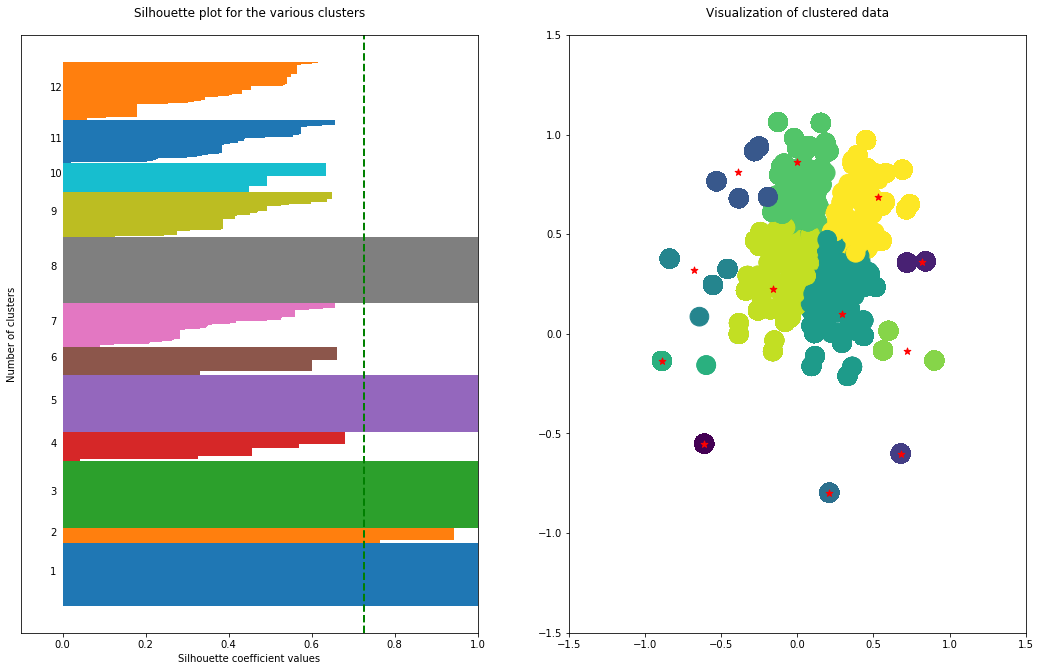

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 11)
#fig, ax1 = plt.subplots(figsize=(8,12))
#fig, ax2 = plt.subplots(figsize=(8,8))
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(y)):
        cluster_silhouette_vals = silhouette_vals[y == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)
        
        
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Number of clusters')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);
#plt.tight_layout()
#fig, ax2 = plt.subplots(figsize=(8,8))

ax2.scatter(X_principal.iloc[:, 0].values, X_principal.iloc[:, 1].values, c=y, s=350)
ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=50)
ax2.set_xlim([-1.5, 1.5])
ax2.set_ylim([-1.5, 1.5])
    #ax2.set_xlabel('Eruption time in mins')
    #ax2.set_ylabel('Waiting time to next eruption')
ax2.set_title('Visualization of clustered data', y=1.02)
#ax2.set_aspect('equal')


In [60]:
rfm_claims_km.head()

,recency,Class_Use_C,frequency,monetary,PENALTY_POINTS,CREDIT_RATING_C,claim_date,incident_date,PTY_ID_hashed,R_quantile,Class_Use_quantile,F_quantile,M_quantile,PENALTY_quantile,CREDIT_RATING_quantile,RFM,Cluster
0,19,5,1,215.65,0,3,11/27/2018,11/20/2018,A3AE79F40F55AAA67D91ABABE3EBD2AF42B6317F50049B...,2,3,1,1,1,3,231113,0
1,9,1,1,396.00,0,3,9/24/2019,8/21/2019,D8541F6B19B992BCCB81711961C13CF2D9A4BA8E70D00D...,1,1,1,1,1,3,111113,10
2,17,6,1,414.31,0,3,1/8/2019,1/5/2019,2F1EFD966EBEDBC0F6EF3617DD30B311346EF5F043AE7E...,1,3,1,1,1,3,131113,7
3,37,6,1,1606.21,0,2,5/30/2017,5/19/2017,F11DEA3E4582E43809F2E8DB9C610588697AA13980126B...,3,3,1,3,1,2,331312,6
4,53,6,1,5488.00,0,1,1/5/2016,12/28/2015,903121340BFF40284C2DEA2207987412E4D47868AD9131...,4,3,1,4,1,1,431411,6


In [61]:
rfm_claims_km[rfm_claims_km['RFM']==rfm_claims_km[rfm_claims_km['Cluster']==3]['RFM'].mode().values[0]].head(1)

,recency,Class_Use_C,frequency,monetary,PENALTY_POINTS,CREDIT_RATING_C,claim_date,incident_date,PTY_ID_hashed,R_quantile,Class_Use_quantile,F_quantile,M_quantile,PENALTY_quantile,CREDIT_RATING_quantile,RFM,Cluster
12,15,6,1,2050.0,0,3,3/8/2019,3/6/2019,98DAB4FF5AA4557C6A560B0623B3341E8F6C865BFE2928...,1,3,1,3,1,3,131313,3


#### Obtaining the most repeated RFM score in each cluster in order to interpret the characteristics of each cluster

In [62]:

for i in range (0,12):
    if i==0:
        df1=rfm_claims_km[rfm_claims_km['RFM']==rfm_claims_km[rfm_claims_km['Cluster']==i]['RFM'].mode().values[0]].head(1)
    else:
        df1=df1.append(rfm_claims_km[rfm_claims_km['RFM']==rfm_claims_km[rfm_claims_km['Cluster']==i]['RFM'].mode().values[0]].head(1))
    

#### 12 microsegments derived from k-means

In [63]:
df1

,recency,Class_Use_C,frequency,monetary,PENALTY_POINTS,CREDIT_RATING_C,claim_date,incident_date,PTY_ID_hashed,R_quantile,Class_Use_quantile,F_quantile,M_quantile,PENALTY_quantile,CREDIT_RATING_quantile,RFM,Cluster
0,19,5,1,215.65,0,3,11/27/2018,11/20/2018,A3AE79F40F55AAA67D91ABABE3EBD2AF42B6317F50049B...,2,3,1,1,1,3,231113,0
11,53,6,1,2200.00,0,3,1/4/2016,1/2/2016,FB35D40AD3DBA607F95DA65DF4F6898D89300384D186B5...,4,3,1,3,1,3,431313,1
24,63,6,1,137.00,0,3,3/9/2015,3/2/2015,71BC0BBC75D38CFB98819A7825855BE808FCAC1BEEFE13...,4,3,1,1,1,3,431113,2
12,15,6,1,2050.00,0,3,3/8/2019,3/6/2019,98DAB4FF5AA4557C6A560B0623B3341E8F6C865BFE2928...,1,3,1,3,1,3,131313,3
118,35,6,1,496.00,0,3,7/24/2017,7/24/2017,30A44FC0CFAF839D8B79766EC5ED41BD9B4E4D274AC7D8...,3,3,1,1,1,3,331113,4
40,12,5,1,1275.00,0,3,6/12/2019,6/7/2019,952CF7FFE46287EE0466630B50E6FDE5382AADA3C3C0D6...,1,3,1,2,1,3,131213,5
1190,52,1,1,223.00,0,3,2/8/2016,2/8/2016,CE87739FEB3143CF90D0C9B98D9E4EA870210A7F90992E...,4,1,1,1,1,3,411113,6
2,17,6,1,414.31,0,3,1/8/2019,1/5/2019,2F1EFD966EBEDBC0F6EF3617DD30B311346EF5F043AE7E...,1,3,1,1,1,3,131113,7
28,27,6,1,2149.00,0,3,3/1/2018,2/28/2018,EA50C31E3D1079036A75C9889187AC7F1B6622BAADE6D1...,2,3,1,3,1,3,231313,8
30,60,6,1,883.00,0,3,6/18/2015,6/4/2015,9BC3660D4683895B3C2CC8C42894F91214691C72CE8102...,4,3,1,2,1,3,431213,9


#### distribution of data among each cluster

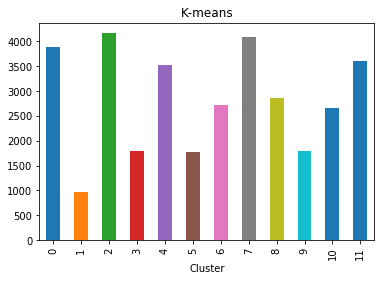

In [64]:
rfm_claims_km['Cluster'].groupby(rfm_claims_km["Cluster"]).count().plot(kind="bar", title = "K-means")

### Application of DBSCAN ML algorithm
#### Within a radius of 0.0375 holding atleast 350 samples within a cluster, 22 clusters are formed

In [65]:
#db_default = DBSCAN(eps = 0.3, min_samples = 150).fit(X_principal) 
db_default = DBSCAN(eps = 0.0375, min_samples = 350).fit(X_principal)
labels = db_default.labels_ 

In [66]:
y1=labels.tolist()

In [67]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 

In [68]:
n_clusters_

22

#### Cluetring with DBSCAN algorithm has a silhouette score of 0.62. Which means about 38% of the samples are similar between the clusters.

In [69]:
silhouette_avg2 = silhouette_score(X_principal,y1)

In [70]:
silhouette_avg2

0.6305737752201171

In [71]:
rfm_claims_db['Cluster'] = y1

In [72]:
rfm_claims_db.head()

,recency,Class_Use_C,frequency,monetary,PENALTY_POINTS,CREDIT_RATING_C,claim_date,incident_date,PTY_ID_hashed,R_quantile,Class_Use_quantile,F_quantile,M_quantile,PENALTY_quantile,CREDIT_RATING_quantile,RFM,Cluster
0,19,5,1,215.65,0,3,11/27/2018,11/20/2018,A3AE79F40F55AAA67D91ABABE3EBD2AF42B6317F50049B...,2,3,1,1,1,3,231113,0
1,9,1,1,396.00,0,3,9/24/2019,8/21/2019,D8541F6B19B992BCCB81711961C13CF2D9A4BA8E70D00D...,1,1,1,1,1,3,111113,1
2,17,6,1,414.31,0,3,1/8/2019,1/5/2019,2F1EFD966EBEDBC0F6EF3617DD30B311346EF5F043AE7E...,1,3,1,1,1,3,131113,2
3,37,6,1,1606.21,0,2,5/30/2017,5/19/2017,F11DEA3E4582E43809F2E8DB9C610588697AA13980126B...,3,3,1,3,1,2,331312,-1
4,53,6,1,5488.00,0,1,1/5/2016,12/28/2015,903121340BFF40284C2DEA2207987412E4D47868AD9131...,4,3,1,4,1,1,431411,-1


#### obtaining the most repeated valu for each cluster

In [73]:
for i in range (-1,22):
    if i==-1:
        grouped_db=rfm_claims_db[rfm_claims_db['RFM']==rfm_claims_db[rfm_claims_db['Cluster']==i]['RFM'].mode().values[0]].head(1)
    else:
        grouped_db=grouped_db.append(rfm_claims_db[rfm_claims_db['RFM']==rfm_claims_db[rfm_claims_db['Cluster']==i]['RFM'].mode().values[0]].head(1))
    

#### 22 clusters derived from DBSCAN

In [74]:
grouped_db

,recency,Class_Use_C,frequency,monetary,PENALTY_POINTS,CREDIT_RATING_C,claim_date,incident_date,PTY_ID_hashed,R_quantile,Class_Use_quantile,F_quantile,M_quantile,PENALTY_quantile,CREDIT_RATING_quantile,RFM,Cluster
344,13,6,2,3044.00,0,3,5/11/2019,5/10/2019,2E2523E8E400AC9F4D2424FFBBFC7C247199F1F912AA9F...,1,3,2,4,1,3,132413,-1
0,19,5,1,215.65,0,3,11/27/2018,11/20/2018,A3AE79F40F55AAA67D91ABABE3EBD2AF42B6317F50049B...,2,3,1,1,1,3,231113,0
1,9,1,1,396.00,0,3,9/24/2019,8/21/2019,D8541F6B19B992BCCB81711961C13CF2D9A4BA8E70D00D...,1,1,1,1,1,3,111113,1
2,17,6,1,414.31,0,3,1/8/2019,1/5/2019,2F1EFD966EBEDBC0F6EF3617DD30B311346EF5F043AE7E...,1,3,1,1,1,3,131113,2
5,45,6,1,636.00,0,3,9/14/2016,8/9/2016,175C6F322B01E28FCEF630B64C0E562C8AB0E0ABD5BC5D...,3,3,1,2,1,3,331213,3
11,53,6,1,2200.00,0,3,1/4/2016,1/2/2016,FB35D40AD3DBA607F95DA65DF4F6898D89300384D186B5...,4,3,1,3,1,3,431313,4
12,15,6,1,2050.00,0,3,3/8/2019,3/6/2019,98DAB4FF5AA4557C6A560B0623B3341E8F6C865BFE2928...,1,3,1,3,1,3,131313,5
15,35,6,1,1795.00,0,3,7/21/2017,7/21/2017,70EC72EF1B748EAE02628C4BE0F35A8E40B3FE278A085B...,3,3,1,3,1,3,331313,6
18,49,6,1,2758.00,0,3,5/26/2016,5/18/2016,06B5BB44B3AB14B51314DA29E26A357E248ABCB981640D...,4,3,1,4,1,3,431413,7
24,63,6,1,137.00,0,3,3/9/2015,3/2/2015,71BC0BBC75D38CFB98819A7825855BE808FCAC1BEEFE13...,4,3,1,1,1,3,431113,8


#### data distribution among 22 clusters

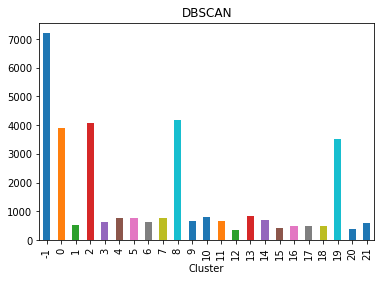

In [75]:
rfm_claims_db['Cluster'].groupby(rfm_claims_db["Cluster"]).count().plot(kind="bar", title = "DBSCAN")

#### In DBSCAN, values with -1 are considered as noise. One of the applications of DBSCAN is detecting outliers. Values with -1 are considered as outliers and are often removed.Since major part of the samples are part of cluster value -1, removing it will lead to huge data loss and wrong analysis. 

In [76]:
rfm_claims_db['Cluster'].unique()

array([ 0,  1,  2, -1,  3,  4,  5,  6,  7, 20,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 21], dtype=int64)

### Using k-means over DBSCAN for microsegmentation

#### 1. silhouette score for k-means is 0.73 whereas for DBSCAN it is 0.62
#### 2. Cluster with values -1 are seem to be more in number from the plot 2. DBSCAN is also used for outlier detection where values with -1 are excluded.  Hence using DBSCAN may lead to wrong results
#### 3. Each cluster from plot 1 has ample amount of data. But with plot2, data distribution among the clusters are not uniform.
### Hence K-means can be prefered over DBSCAN for this particular study

### Interpretation of risk assessment on12 microsegments derived from kmeans

In [77]:
df1['Risk']=np.where(df1['M_quantile']==3, "High Risk",
                        np.where(df1['M_quantile']==2, "Medium Risk",
                        np.where(df1['Class_Use_quantile']==1, "Potential" ,"Less Risk")))
            
                                  

In [78]:
df1

,recency,Class_Use_C,frequency,monetary,PENALTY_POINTS,CREDIT_RATING_C,claim_date,incident_date,PTY_ID_hashed,R_quantile,Class_Use_quantile,F_quantile,M_quantile,PENALTY_quantile,CREDIT_RATING_quantile,RFM,Cluster,Risk
0,19,5,1,215.65,0,3,11/27/2018,11/20/2018,A3AE79F40F55AAA67D91ABABE3EBD2AF42B6317F50049B...,2,3,1,1,1,3,231113,0,Less Risk
11,53,6,1,2200.00,0,3,1/4/2016,1/2/2016,FB35D40AD3DBA607F95DA65DF4F6898D89300384D186B5...,4,3,1,3,1,3,431313,1,High Risk
24,63,6,1,137.00,0,3,3/9/2015,3/2/2015,71BC0BBC75D38CFB98819A7825855BE808FCAC1BEEFE13...,4,3,1,1,1,3,431113,2,Less Risk
12,15,6,1,2050.00,0,3,3/8/2019,3/6/2019,98DAB4FF5AA4557C6A560B0623B3341E8F6C865BFE2928...,1,3,1,3,1,3,131313,3,High Risk
118,35,6,1,496.00,0,3,7/24/2017,7/24/2017,30A44FC0CFAF839D8B79766EC5ED41BD9B4E4D274AC7D8...,3,3,1,1,1,3,331113,4,Less Risk
40,12,5,1,1275.00,0,3,6/12/2019,6/7/2019,952CF7FFE46287EE0466630B50E6FDE5382AADA3C3C0D6...,1,3,1,2,1,3,131213,5,Medium Risk
1190,52,1,1,223.00,0,3,2/8/2016,2/8/2016,CE87739FEB3143CF90D0C9B98D9E4EA870210A7F90992E...,4,1,1,1,1,3,411113,6,Potential
2,17,6,1,414.31,0,3,1/8/2019,1/5/2019,2F1EFD966EBEDBC0F6EF3617DD30B311346EF5F043AE7E...,1,3,1,1,1,3,131113,7,Less Risk
28,27,6,1,2149.00,0,3,3/1/2018,2/28/2018,EA50C31E3D1079036A75C9889187AC7F1B6622BAADE6D1...,2,3,1,3,1,3,231313,8,High Risk
30,60,6,1,883.00,0,3,6/18/2015,6/4/2015,9BC3660D4683895B3C2CC8C42894F91214691C72CE8102...,4,3,1,2,1,3,431213,9,Medium Risk


#### Class for each risk groups

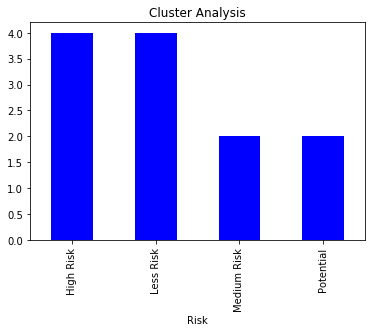

In [79]:
df1['Risk'].groupby(df1["Risk"]).count().plot(kind="bar", title = "Cluster Analysis", color = "blue")